# Análisis del Rendimiento de Estudiantes

## Introducción

Este proyecto se centra en analizar el rendimiento de estudiantes en tres áreas clave: matemáticas, lectura y escritura, utilizando el dataset 'Students Performance'. El objetivo es explorar cómo diversas características demográficas y socioeconómicas, como el género, el grupo étnico y el nivel educativo de los padres, influyen en el rendimiento académico de los estudiantes.

A través de este análisis, buscamos identificar patrones significativos y factores predictivos que puedan ayudar en la formulación de estrategias para mejorar el rendimiento estudiantil. Las principales tareas incluirán la exploración de datos, visualización, manejo de datos faltantes, análisis estadístico y modelado predictivo para estimar el rendimiento en matemáticas.

Este análisis no solo aportará insights valiosos sobre la educación sino que también demostrará cómo técnicas avanzadas de análisis de datos pueden aplicarse en contextos educativos para obtener conclusiones prácticas y útiles.


## Carga de Datos
A continuación, cargamos el dataset utilizando la librería Pandas. Contiene las siguientes columnas de interés:
- `gender`: Género del estudiante.
- `race/ethnicity`: Grupo étnico del estudiante.
- `parental level of education`: Nivel educativo de los padres.
- `lunch`: Tipo de almuerzo.
- `test preparation course`: Si el estudiante tomó o no un curso de preparación.
- `math score`, `reading score`, `writing score`: Puntuaciones en las pruebas de matemáticas, lectura y escritura.


In [67]:
import pandas as pd

# Load the data
data_path = '../data/StudentsPerformance.csv'
df = pd.read_csv(data_path)

# Show the first rows of the dataframe using the head method
df.head()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [68]:
# General information about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [69]:
# Summary statistics for the numerical columns
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [70]:
# Check for missing values
df.isnull().sum()

#check for missing values and handle them if any
if df.isnull().sum().any():
    # fill missing values with the mean when the column is numerical and with the mode when the column is categorical
    df.fillna({
        'math score': df['math score'].mean(),
        'reading score': df['reading score'].mean(),
        'writing score': df['writing score'].mean(),
        'gender': df['gender'].mode()[0],
        'race/ethnicity': df['race/ethnicity'].mode()[0],
        'parental level of education': df['parental level of education'].mode()[0],
        'lunch': df['lunch'].mode()[0],
        'test preparation course': df['test preparation course'].mode()[0]
    }, inplace=True)
else:
    print('No missing values found')


No missing values found


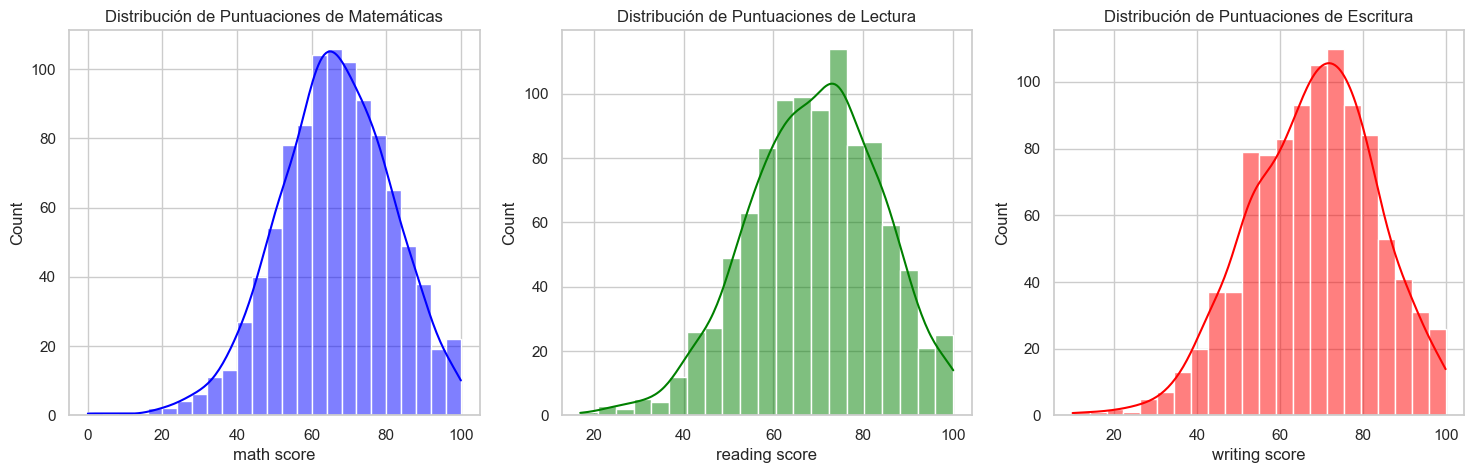

In [71]:
## Histogramas de las puntuaciones
''' 
Utilizamos histogramas para visualizar la distribución de las puntuaciones en matemáticas, lectura y escritura. 
Estos gráficos nos permiten observar la forma de la distribución y detectar si existen patrones como asimetría o presencia de picos.

'''

import matplotlib.pyplot as plt
import seaborn as sns

# Setting the style of seaborn
sns.set(style="whitegrid")

# Creating the histogram plots for the math, reading, and writing scores
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
sns.histplot(df['math score'], kde=True, color='blue')
plt.title('Distribución de Puntuaciones de Matemáticas')

plt.subplot(1, 3, 2)
sns.histplot(df['reading score'], kde=True, color='green')
plt.title('Distribución de Puntuaciones de Lectura')

plt.subplot(1, 3, 3)
sns.histplot(df['writing score'], kde=True, color='red')
plt.title('Distribución de Puntuaciones de Escritura')

plt.show()


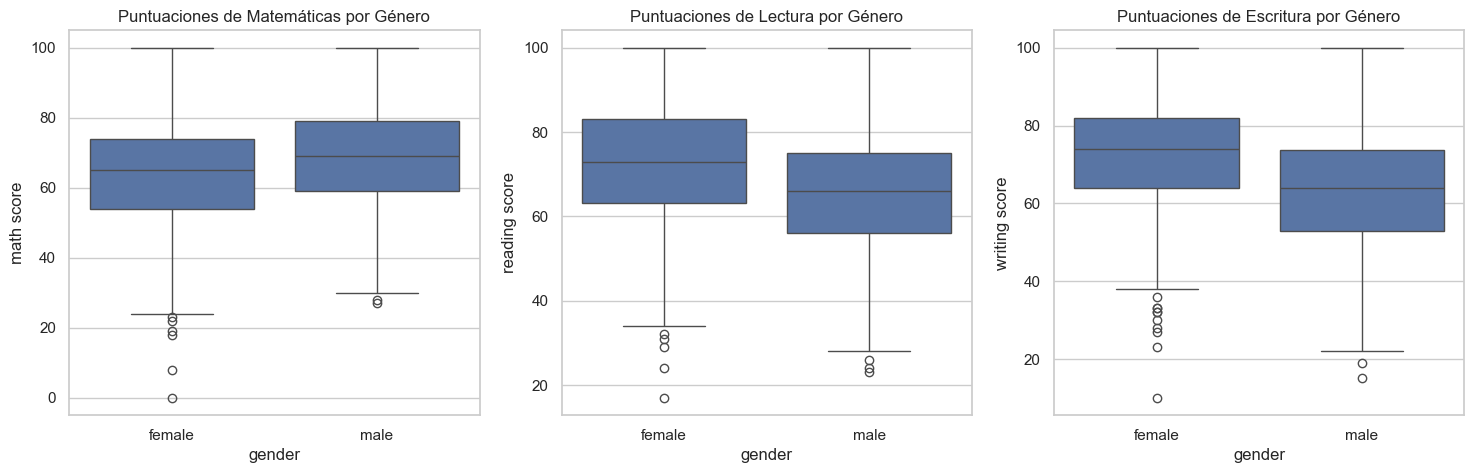

In [72]:
## Gráficos de Caja por Género

'''
Los gráficos de caja proporcionan una forma visual de comparar la distribución de las puntuaciones entre diferentes grupos de género, destacando diferencias en medianas, rangos intercuartílicos y la presencia de valores atípicos.
'''

# Graphs of box plots to compare performance by gender
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x='gender', y='math score', data=df)
plt.title('Puntuaciones de Matemáticas por Género')

plt.subplot(1, 3, 2)
sns.boxplot(x='gender', y='reading score', data=df)
plt.title('Puntuaciones de Lectura por Género')

plt.subplot(1, 3, 3)
sns.boxplot(x='gender', y='writing score', data=df)
plt.title('Puntuaciones de Escritura por Género')

plt.show()


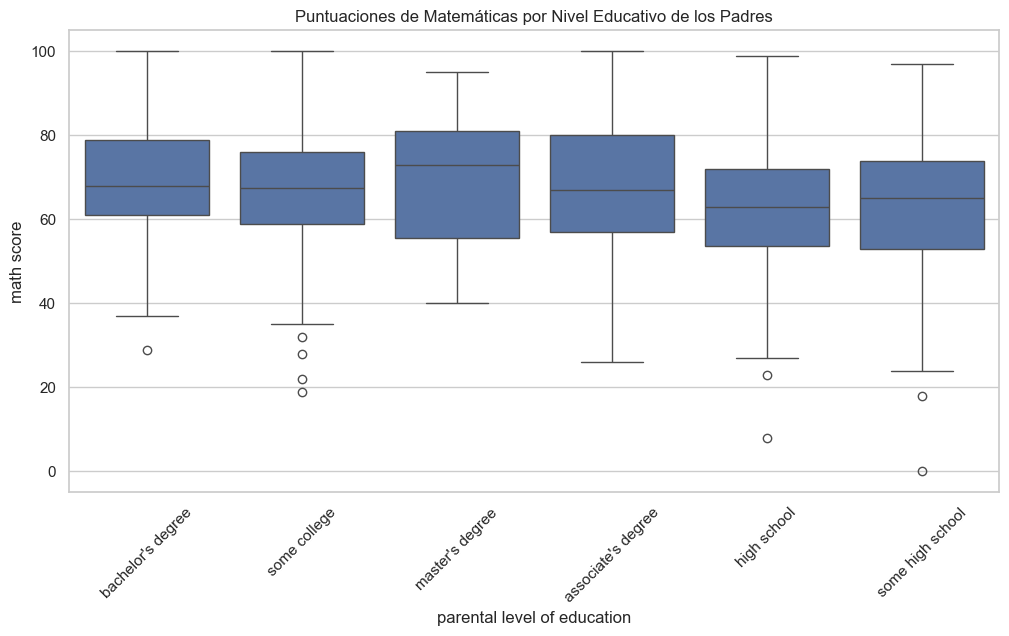

In [73]:
# Gráfico de caja del nivel educativo de los padres y las puntuaciones en matemáticas
plt.figure(figsize=(12, 6))
sns.boxplot(x='parental level of education', y='math score', data=df)
plt.xticks(rotation=45)
plt.title('Puntuaciones de Matemáticas por Nivel Educativo de los Padres')
plt.show()


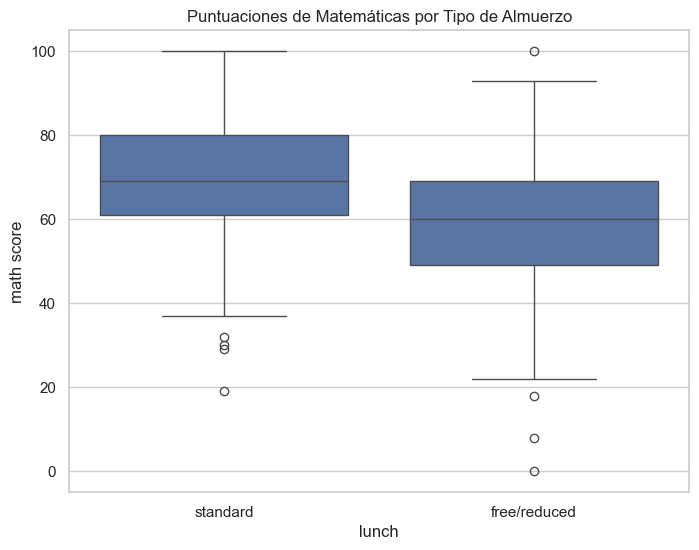

In [74]:
# Gráfico de caja de la relación entre el almuerzo y las puntuaciones en matemáticas
plt.figure(figsize=(8, 6))
sns.boxplot(x='lunch', y='math score', data=df)
plt.title('Puntuaciones de Matemáticas por Tipo de Almuerzo')
plt.show()

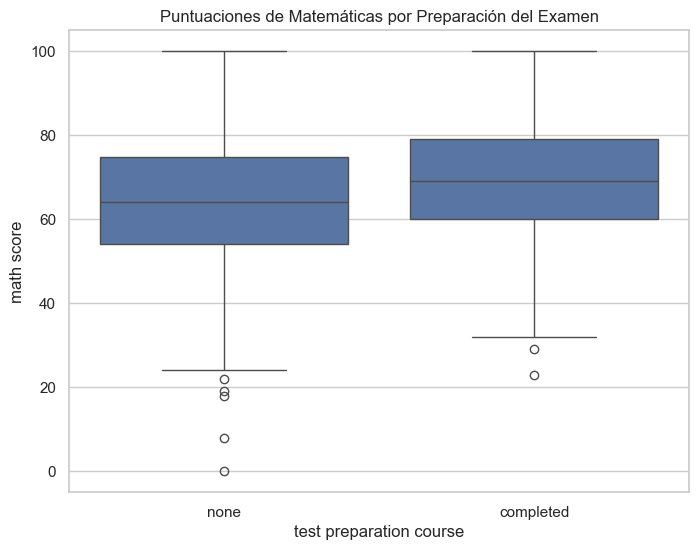

In [75]:
# Gráfico de caja de la relación entre la preparación del examen y las puntuaciones en matemáticas
plt.figure(figsize=(8, 6))
sns.boxplot(x='test preparation course', y='math score', data=df)
plt.title('Puntuaciones de Matemáticas por Preparación del Examen')
plt.show()

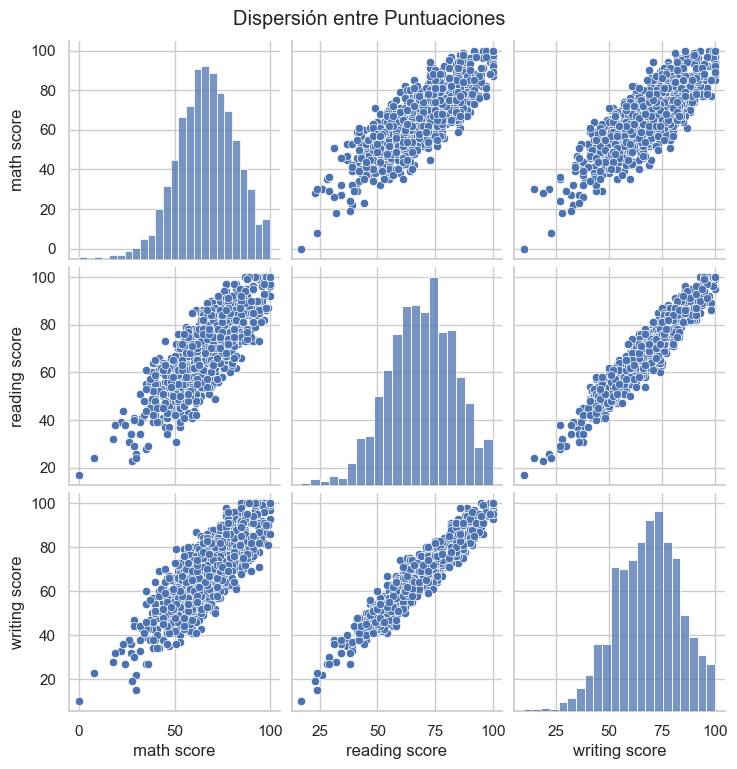

In [76]:
## Gráficos de Dispersión entre Puntuaciones
'''
Utilizamos gráficos de dispersión para evaluar la relación entre las diferentes puntuaciones académicas. Estos gráficos ayudan a identificar correlaciones potenciales entre las puntuaciones en matemáticas, lectura y escritura.

'''
# Gráficos de dispersión entre las puntuaciones
sns.pairplot(df[['math score', 'reading score', 'writing score']])
plt.suptitle('Dispersión entre Puntuaciones', y=1.02)
plt.show()


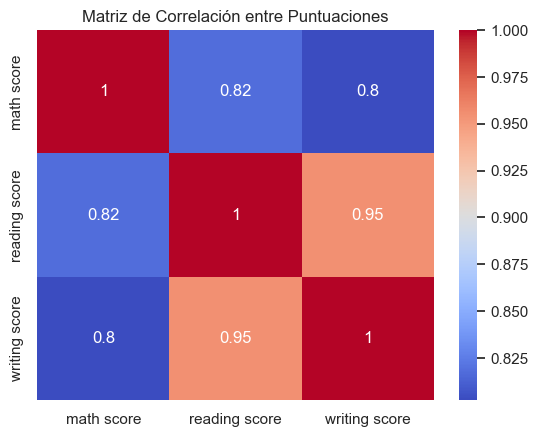

In [77]:
# Correlaciones entre las puntuaciones
correlation_matrix = df[['math score', 'reading score', 'writing score']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación entre Puntuaciones')
plt.show()

In [78]:
# Codification of categorical variables and division data
from sklearn.model_selection import train_test_split

df_encoded = pd.get_dummies(df, columns=['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course'])
X = df_encoded.drop(['math score', 'reading score', 'writing score'], axis=1)  # Delete other scores to focus on math score
y = df_encoded['math score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [79]:
# Prepare the additional models
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor

models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=0.1),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42)
}

# Train and evaluate the models
for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    print(f"\n\n{name} Mean Squared Error: {mse}")

    # If the model is a linear regression, we can check the coefficients
    if hasattr(model, 'coef_'):
        importance = pd.DataFrame({
            'Attribute': X_train.columns,
            'Importance': model.coef_
        })
        importance = importance.sort_values(by='Importance', ascending=False)
        print(f"{name} coefficient importance:\n", importance.head())

Linear Regression Mean Squared Error: 206.7675
Linear Regression coefficient importance:
                             Attribute    Importance
15  test preparation course_completed  1.264940e+15
16       test preparation course_none  1.264940e+15
6              race/ethnicity_group E  9.731116e+14
5              race/ethnicity_group D  9.731116e+14
2              race/ethnicity_group A  9.731116e+14
Ridge Regression Mean Squared Error: 200.51848610181966
Ridge Regression coefficient importance:
                                         Attribute  Importance
6                          race/ethnicity_group E    6.331807
14                                 lunch_standard    5.746507
8   parental level of education_bachelor's degree    3.578094
15              test preparation course_completed    2.930948
1                                     gender_male    2.253577
Lasso Regression Mean Squared Error: 203.09482368036413
Lasso Regression coefficient importance:
                               